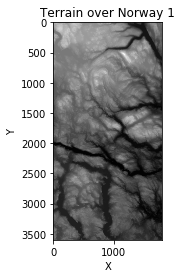

In [100]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


(50, 50)


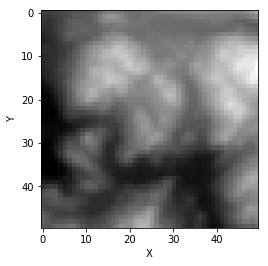

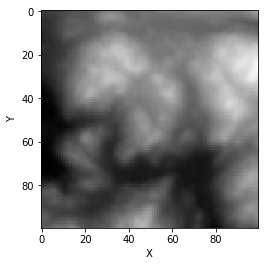

In [101]:
terrain_highres = np.array(terrain1)[500:600, 500:600]
terrain = np.array(terrain1)[500:600:2, 500:600:2]
terrain = terrain - np.mean(terrain)
print (terrain.shape)
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.imshow(terrain_highres, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [102]:
N = terrain.shape[0]
x = np.arange(N)
y = x.copy()
x_, y_ = np.meshgrid(x, y)
x, y = x_.reshape(N**2, 1), y_.reshape(N**2, 1)
z = terrain.reshape(N**2, 1)


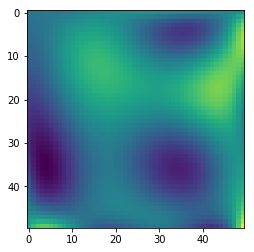

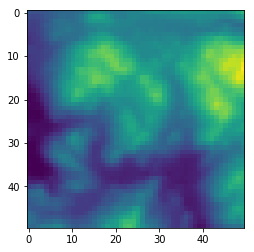

In [92]:
from Reg_class import plotter
def test_order (order):
    DM = DesignMatrix(x, y, order)
    reg = Polyfit()
    fit = reg.fit(DM, z, 'OLS')[1]
    plt.imshow(fit.reshape(N, N))
    plt.show()
    plt.imshow(terrain)
    plt.show()
test_order(5)

In [103]:
from Reg_class import train_test_split
train, test = train_test_split(x, y, z)
x_train, y_train, z_train = train
x_test, y_test, z_test = test
print (x_train.shape)

(1875, 1)


OLS regression

In [90]:
from sklearn.model_selection import KFold
from Reg_class import Polyfit, DesignMatrix, R2

pmax = 30
k=5
n = x_train.shape[0]
p = np.arange(1,pmax+1)
kfold = KFold(n_splits = k,shuffle=True,random_state=5)

err = np.empty(pmax)
bias = np.empty(pmax)
var = np.empty(pmax)
r2 = np.empty(pmax)
reg = Polyfit()


for i in range(pmax):
    zpred = np.empty((int(n/k), k))
    j=0

    for train_ind,test_ind in kfold.split(x_train):
        Xtrain = DesignMatrix(x_train[train_ind], y_train[train_ind], p[i])
        reg.fit(Xtrain, z_train[train_ind], 'OLS')
        Xtest = DesignMatrix(x_train[test_ind], y_train[test_ind], p[i])
        ztest = z_train[test_ind]
        zpred[:,j] = reg.predict(Xtest).ravel()
        j+=1
    r2[i] = np.mean(1 - np.sum((ztest - zpred)**2, axis=1, keepdims=True)/ \
            np.sum((ztest - np.mean(ztest))**2, axis=1, keepdims=True))
    err[i] = np.mean( np.mean((ztest - zpred)**2, axis=1, keepdims=True) )
    bias[i] = np.mean( (ztest - np.mean(zpred, axis=1, keepdims=True))**2 )
    var[i] = np.mean( np.var(zpred, axis=1, keepdims=True) )

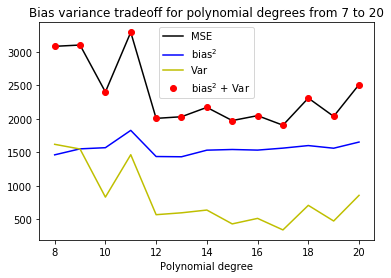

In [97]:
plt.figure()
pstart = 7
pstop =20
plt.plot(p[pstart:pstop],err[pstart:pstop],'k',label='MSE')
plt.plot(p[pstart:pstop],bias[pstart:pstop],'b',label=r'bias$^2$')
plt.plot(p[pstart:pstop],var[pstart:pstop],'y',label='Var')

plt.plot(p[pstart:pstop],var[pstart:pstop] + bias[pstart:pstop] ,'ro',label=r'bias$^2$ + Var')

plt.xlabel('Polynomial degree')
plt.title('Bias variance tradeoff for polynomial degrees from 7 to 20')
plt.legend()
plt.savefig('bvt7_20.pdf')
plt.show()

ridge regression

In [ ]:
from sklearn.model_selection import KFold
from Reg_class import Polyfit, DesignMatrix, R2

pmax = 20
k=5
l = 10
n = x_train.shape[0]
p = np.arange(1,pmax+1)
kfold = KFold(n_splits = k,shuffle=True,random_state=5)
lambdas = np.linspace(1e-6, 0.1, l)
print (lambdas.shape)

err = np.empty((pmax, lmax))
bias = np.empty((pmax, lmax))
var = np.empty((pmax, lmax))
r2 = np.empty((pmax, lmax))
reg = Polyfit()

for j in range(l):
    for i in range(pmax):
        zpred = np.empty((int(n/k), k))
        s=0

        for train_ind,test_ind in kfold.split(x_train):
            Xtrain = DesignMatrix(x_train[train_ind], y_train[train_ind], p[i])
            reg.fit(Xtrain, z_train[train_ind], 'lasso', lm = lambdas[j])
            Xtest = DesignMatrix(x_train[test_ind], y_train[test_ind], p[i])
            ztest = z_train[test_ind]
            zpred[:,s] = reg.predict(Xtest).ravel()
            s+=1
        r2[i, j] = np.mean(1 - np.sum((ztest - zpred)**2, axis=1, keepdims=True)/ \
                np.sum((ztest - np.mean(ztest))**2, axis=1, keepdims=True))
        err[i, j] = np.mean( np.mean((ztest - zpred)**2, axis=1, keepdims=True) )
        bias[i, j] = np.mean( (ztest - np.mean(zpred, axis=1, keepdims=True))**2 )
        var[i, j] = np.mean( np.var(zpred, axis=1, keepdims=True) )

(10,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(20, 15)


Text(0.5, 0, '$\\lambda$')

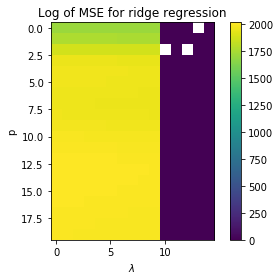

In [129]:
plt.imshow(err)
print (err.shape)
plt.colorbar()
plt.title ('Log of MSE for ridge regression')
plt.ylabel('p')
plt.xlabel(r'$\lambda$')
#plt.savefig('ridgekval')
    

Text(0.5, 0, '$\\lambda$')

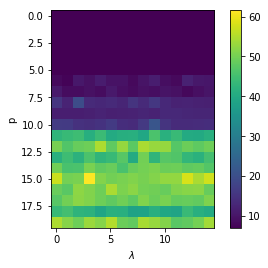

In [113]:
plt.imshow(np.log(bias))
plt.colorbar()
plt.ylabel('p')
plt.xlabel(r'$\lambda$')
    

Text(0.5, 0, '$\\lambda$')

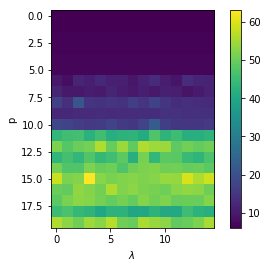

In [114]:
plt.imshow(np.log(var))
plt.colorbar()
plt.ylabel('p')
plt.xlabel(r'$\lambda$')
    